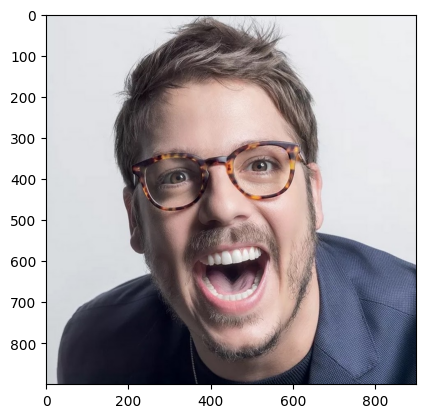

In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys 

img = cv.imread("fabio_porchat.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [28]:
print("O numero total de pixels da imagem é:", img.size)
print("O tamanho de linhas, colunas e canais da imagem:", img.shape)

O numero total de pixels da imagem é: 2430000
O tamanho de linhas, colunas e canais da imagem: (900, 900, 3)


Vamos adicionar uma nova imagem agora

In [29]:
img2 = cv.imread('todt.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
print("O numero total de pixels da imagem é:", img2.size)
print("O tamanho de linhas, colunas e canais da imagem:", img2.shape)


O numero total de pixels da imagem é: 120000
O tamanho de linhas, colunas e canais da imagem: (200, 200, 3)


Podemos ver que a imagem tem tamanho distinto da imagem inicial, e vamos aumentar ela de tamanho com resize então. 
Existem diversas maneiras de interpolar para a alteração de tamanho, vejamos abaixo:


(<Axes: >, <matplotlib.image.AxesImage at 0x7fb839ccb3a0>)

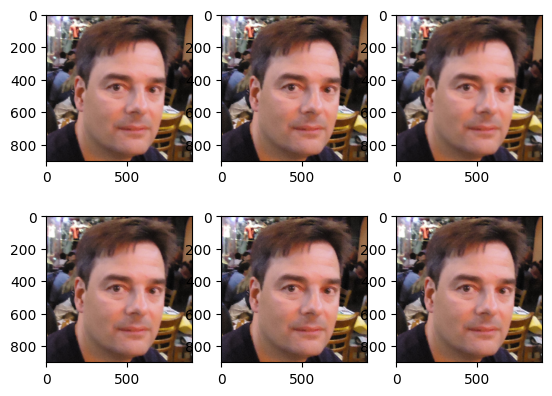

In [30]:
#Interpolation = cv.INTER_AREA, resampling usando a relação de area de pixel
resized_1 = cv.resize(img2, (900,900), interpolation = cv.INTER_AREA) 
#Interpolation = cv.INTER_CUBIC, resampling usando a interpolação cúbica
resized_2 = cv.resize(img2, (900,900), interpolation = cv.INTER_CUBIC)
#Interpolation = cv.INTER_LINEAR, resampling usando a interpolação linear
resized_3 = cv.resize(img2, (900,900), interpolation = cv.INTER_LINEAR)
#Interpolation = cv.INTER_NEAREST, resampling usando o pixel mais próximo
resized_4 = cv.resize(img2, (900,900), interpolation = cv.INTER_NEAREST)
#Interpolation = cv.INTER_LANCZOS4, resampling usando a interpolação de Lanczos sobre a vizinhança de 8 pixels
resized_5 = cv.resize(img2, (900,900), interpolation = cv.INTER_LANCZOS4)
#Interpolation = cv.INTER_CUBIC, resampling usando a interpolação cúbica
resized_6 = cv.resize(img2, (900,900), interpolation = cv.INTER_CUBIC)

plt.subplot(2,3,1),plt.imshow(resized_1)
plt.subplot(2,3,2),plt.imshow(resized_2)
plt.subplot(2,3,3),plt.imshow(resized_3)
plt.subplot(2,3,4),plt.imshow(resized_4)
plt.subplot(2,3,5),plt.imshow(resized_5)
plt.subplot(2,3,6),plt.imshow(resized_6)

Image Blending

Para realizar um blend de imagens, adicionamos uma a outra respeitando a equação abaixo:
                                g(x)=(1−α)f0(x)+αf1(x)

Variando alpha de 0->1, podemos realizar distintos tipos de transições nas imagens. Cv.addWeighted() aplica a seguinte formula para a aplicação:
                                dst=α⋅img1+β⋅img2+γ

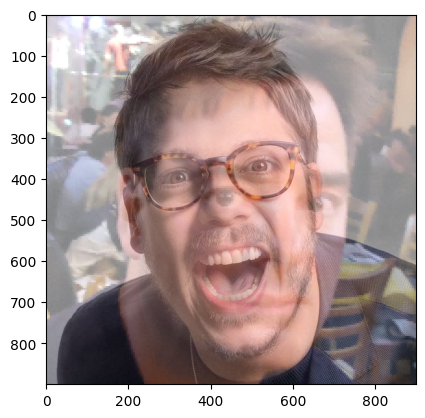

In [31]:
blend = cv.addWeighted(img,0.58,resized_1,0.52,0)
plt.imshow(blend)

(<Axes: >, <matplotlib.image.AxesImage at 0x7fb8397a3dc0>)

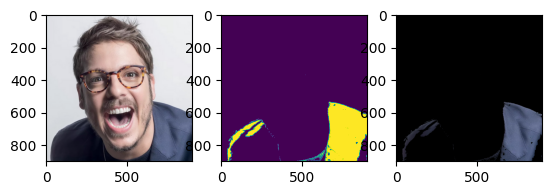

In [32]:
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV) #transforma de RGB para HSV
mask = cv.inRange(img_hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv.bitwise_and(img_hsv, img_hsv, mask=mask)
img_hsv = cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB)
res = cv.cvtColor(res, cv.COLOR_HSV2RGB)
plt.subplot(2,3,1),plt.imshow(img_hsv)
plt.subplot(2,3,2),plt.imshow(mask)
plt.subplot(2,3,3),plt.imshow(res)

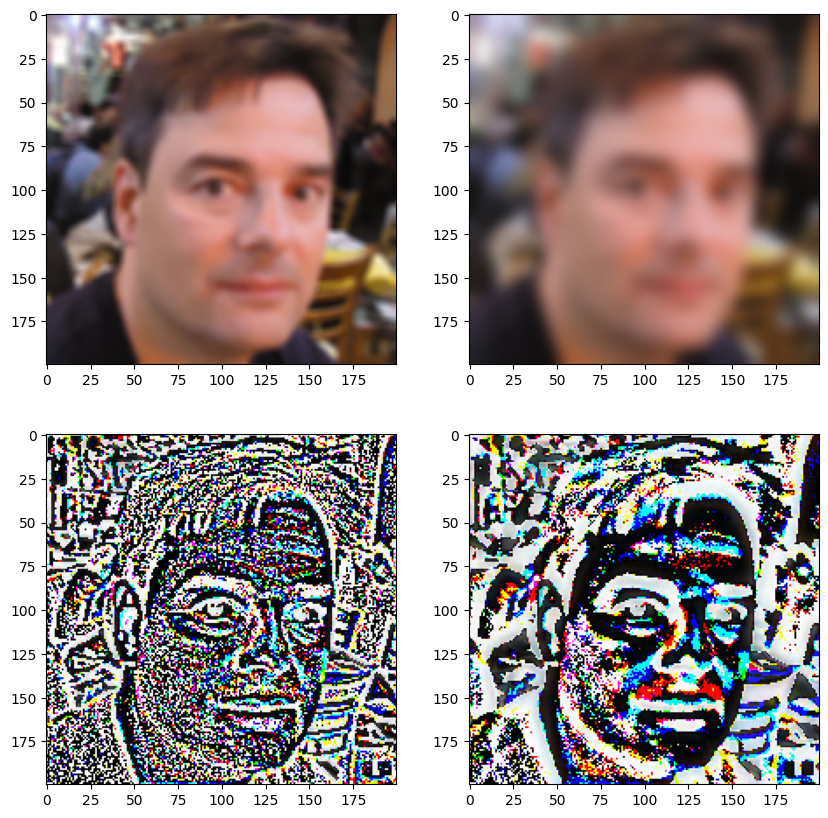

In [33]:
img3 = cv.imread('todt.png')
gray = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
gauss1 = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)
gauss2 = cv.GaussianBlur(gray,(23,23),cv.BORDER_DEFAULT)
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(gauss1)
ax[0][1].imshow(gauss2)
ax[1][0].imshow(gray-gauss1)
ax[1][1].imshow(gray-gauss2)

Usando filtro gaussiano para detectar bordas na imagem

O filtro gaussiano é uma técnica popular de processamento de imagem usada para suavizar e desfocar imagens. No entanto, também pode ser utilizado para gerar bordas de imagem. Ao aplicar o filtro gaussiano a uma imagem, é possível obter um efeito de suavização das bordas, criando uma transição suave do conteúdo da imagem para as bordas. Em seguida, é possível gerar outra imagem subtraindo a imagem filtrada da original, realçando as bordas.É importante notar que quanto maior o kernel gaussiano, mais espessas serão as bordas.